In [1]:
import maup
import pandas as pd
import geopandas as gp

# Shortened Code

In [33]:
can_fix_w_automation = {'390599780003013': ['MUSKINGUM-PRECINCT RICH HILL', 'GUERNSEY-ACO'],
 '391279663011065': ['HOCKING-PRECINCT FALLS 2', 'PERRY-AAT'],
 '390070010011021': ['GEAUGA-PRECINCT THOMPSON TWP B', 'ASHTABULA-AES'],
 '390250401013019': ['BROWN-PERRY TWP SOUTH', 'CLERMONT-JACKSON TOWNSHIP A'],
 '390610260012001': ['HAMILTON-HARR TWP BB', 'BUTLER-MORGAN TWP 1'],
 '390610260012003': ['HAMILTON-HARR TWP BB', 'BUTLER-MORGAN TWP 1'],
 '390610260012002': ['HAMILTON-HARR TWP BB', 'BUTLER-MORGAN TWP 1'],
 '391650320091054': ['HAMILTON-SYMMES I', 'WARREN-AFH'],
 '391650320091053': ['HAMILTON-SYMMES I', 'WARREN-AFH'],
 '390339742004057': ['MARION-PRECINCT SCOTT TULLY', 'CRAWFORD-ABX'],
 '391650320062019': ['HAMILTON-SYMMES D', 'WARREN-ACB'],
 '390719552003050': ['BROWN-WASHINGTON TWP', 'HIGHLAND-AAS'],
 '391439621001012': ['ERIE-PRECINCT MAR TWP #2', 'SANDUSKY-ACX']}

requires_additional_checking = {'391093801001014': ['MIAMI-PRECINCT BETHEL WEST',
  'MIAMI-PRECINCT TIPP CITY H'],
 '390430417013007': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417023029': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417011015': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417011016': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417023027': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417011005': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417023023': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417011003': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417011002': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390351561011018': ['CUYAHOGA-INDEPENDENCE-00-D',
  'CUYAHOGA-VALLEY VIEW-00-A'],
 '390351351061030': ['CUYAHOGA-BRECKSVILLE-00-F', 'CUYAHOGA-BRECKSVILLE-00-G'],
 '390351731073015': ['CUYAHOGA-MIDDLEBURG HEIGHTS-01-B',
  'CUYAHOGA-MIDDLEBURG HEIGHTS-02-B'],
 '390351351061028': ['CUYAHOGA-BRECKSVILLE-00-F', 'CUYAHOGA-BRECKSVILLE-00-G'],
 '390351351061029': ['CUYAHOGA-BRECKSVILLE-00-F', 'CUYAHOGA-BRECKSVILLE-00-G'],
 '390170151001010': ['BUTLER-LIBERTY TWP 1', 'BUTLER-MADISON TWP 5'],
 '390170111233019': ['BUTLER-WEST CHESTER TWP 35',
  'BUTLER-WEST CHESTER TWP 39'],
 '390299514023041': ['COLUMBIANA-PRECINCT LISBON VIL NORTH',
  'COLUMBIANA-PRECINCT CENTER TWP NORTH'],
 '391730213002041': ['WOOD-GRAND RAPIDS TWP GR VILL',
  'WOOD-GRAND RAPIDS TWP PARK'],
 '391093801001015': ['MIAMI-PRECINCT BETHEL WEST',
  'MIAMI-PRECINCT TIPP CITY H'],
 '390430417011014': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390299502004025': ['COLUMBIANA-PRECINCT FAIRFIELD TWP NORTH',
  'COLUMBIANA-PRECINCT FAIRFIELD TWP CENTER'],
 '390430417011013': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417023024': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390170101052004': ['BUTLER-OXFORD 2', 'BUTLER-OXFORD TWP 3'],
 '390430417011006': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417011007': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417023026': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417011017': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417011019': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417011018': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417011004': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417023025': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417011011': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417013008': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417013009': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417011001': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1'],
 '390430417011012': ['ERIE-PRECINCT CAST VILL', 'ERIE-PRECINCT MAR TWP #1']}



In [34]:
def clean_gdf(block_cnty, pct_1_id, pct_1_cnty, pct_2_id, pct_2_cnty):
    print("Working on precinct #1:", pct_1_id)
    print("Working on precinct #2:", pct_2_id)
    pct_1 = oh_gen.loc[oh_gen["UNIQUE_ID"]==pct_1_id]
    pct_2 = oh_gen.loc[oh_gen["UNIQUE_ID"]==pct_2_id]
    
    if (block_cnty == pct_1_cnty):
        diff = gp.overlay(pct_2, pct_1, how = "difference")
        oh_gen.loc[oh_gen["UNIQUE_ID"]==pct_2_id, "geometry"] = diff.geometry
    elif (block_cnty == pct_2_cnty):
        diff = gp.overlay(pct_1, pct_2, how = "difference")
        oh_gen.loc[oh_gen["UNIQUE_ID"]==pct_1_id, "geometry"] = diff.geometry
    else:
        raise ValueError
        


In [35]:
for key, val in can_fix_w_automation.items():
    clean_gdf(key[2:5], val[0], oh_gen.loc[oh_gen["UNIQUE_ID"]==val[0],"COUNTYFP"].values[0], val[1], oh_gen.loc[oh_gen["UNIQUE_ID"]==val[1],"COUNTYFP"].values[0])

Working on precinct #1: MUSKINGUM-PRECINCT RICH HILL
Working on precinct #2: GUERNSEY-ACO
Working on precinct #1: HOCKING-PRECINCT FALLS 2
Working on precinct #2: PERRY-AAT
Working on precinct #1: GEAUGA-PRECINCT THOMPSON TWP B
Working on precinct #2: ASHTABULA-AES
Working on precinct #1: BROWN-PERRY TWP SOUTH
Working on precinct #2: CLERMONT-JACKSON TOWNSHIP A
Working on precinct #1: HAMILTON-HARR TWP BB
Working on precinct #2: BUTLER-MORGAN TWP 1
Working on precinct #1: HAMILTON-HARR TWP BB
Working on precinct #2: BUTLER-MORGAN TWP 1


TypeError: `keep_geom_type` does not support None.

# Long Code

In [2]:
# Load in OH precincts
oh_gen = gp.read_file("./oh_2022_gen_prec_shp/oh_2022_gen_prec_st.shp")

# Load in OH blocks
oh_blocks = gp.read_file("./oh_pl2020_b/oh_pl2020_p1_b.shp")[['GEOID20','P0010001', 'geometry']] #raw_data/census/2020_TIGER_B/oh_b_2020_bound/oh_b_2020_bound.shp)

oh_gen = oh_gen.to_crs(3857)
oh_blocks = oh_blocks.to_crs(3857)

oh_gen["precinct_area"] = oh_gen.area
oh_blocks["block_area"] = oh_blocks.area

In [7]:
self_intersection = gp.overlay(oh_gen, oh_blocks, how = "intersection", keep_geom_type = False)

In [23]:

self_intersect_ser = self_intersection["GEOID20"].value_counts()
one_geoid = list(self_intersect_ser[self_intersect_ser == 1].index)

In [24]:
self_intersection.shape

(490318, 29)

In [25]:
self_intersection_filtered = self_intersection[~self_intersection["GEOID20"].isin(one_geoid)]

In [26]:
self_intersection_filtered.shape

(365246, 29)

In [27]:
self_intersection_filtered["intersection_area"] = self_intersection_filtered.area
self_intersection_filtered["intersection_pct"] = self_intersection_filtered["intersection_area"]/self_intersection_filtered["block_area"]

/Users/lilyfalk/anaconda3/envs/pdv_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/Users/lilyfalk/anaconda3/envs/pdv_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [28]:
ser_2 = self_intersection_filtered[self_intersection_filtered["intersection_pct"]>=.5]["GEOID20"].value_counts()

In [29]:
ser_2

GEOID20
390430417011017    2
390430417011015    2
391650320062019    2
390430417023025    2
390430417011004    2
                  ..
390950096003020    1
390950096001045    1
390950089063017    1
390690001003029    1
391535310026007    1
Name: count, Length: 150950, dtype: int64

In [30]:
last_filter = self_intersection_filtered[self_intersection_filtered["intersection_pct"]>=.5]

In [31]:
possible_problems = list(ser_2[ser_2>=2].index)

In [32]:
ser_2[ser_2>=2].index

Index(['390430417011017', '390430417011015', '391650320062019',
       '390430417023025', '390430417011004', '390430417011011',
       '390430417013008', '390430417013009', '390430417011012',
       '390430417011013', '390430417013007', '390430417011014',
       '390430417023029', '390430417011016', '391730213002041',
       '390430417023027', '390430417011005', '390430417023023',
       '390430417011003', '390430417011002', '390070010011021',
       '390859900000004', '391650320091053', '391650320091054',
       '390930224001009', '390950097002027', '390430417011001',
       '390430417023024', '390430417011018', '390430417011019',
       '390170151001010', '391093801001014', '391093801001015',
       '390170101052004', '390351351061030', '390351351061028',
       '390351351061029', '391279663011065', '390170111233019',
       '390599780003013', '391439621001012', '390351561011018',
       '390859900000009', '390250401013019', '390299502004025',
       '390430419004001', '3909302220020

In [33]:
def clean_gdf(block_cnty, pct_1_id, pct_1_cnty, pct_2_id, pct_2_cnty):
    print("Working on precinct #1:", pct_1_id)
    print("Working on precinct #2:", pct_2_id)
    pct_1 = oh_gen.loc[oh_gen["UNIQUE_ID"]==pct_1_id]
    pct_2 = oh_gen.loc[oh_gen["UNIQUE_ID"]==pct_2_id]
    
    if (block_cnty == pct_1_cnty):
        diff = gp.overlay(pct_2, pct_1, how = "difference")
        oh_gen.loc[oh_gen["UNIQUE_ID"]==pct_2_id, "geometry"] = diff.geometry
    elif (block_cnty == pct_2_cnty):
        diff = gp.overlay(pct_1, pct_2, how = "difference")
        oh_gen.loc[oh_gen["UNIQUE_ID"]==pct_1_id, "geometry"] = diff.geometry
    else:
        raise ValueError
        


In [34]:
block[2:5]

'165'

Working on precinct #1: HAMILTON
Working on precinct #2: WARREN


/Users/lilyfalk/anaconda3/envs/pdv_env/lib/python3.9/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


Working on precinct #1: GEAUGA
Working on precinct #2: ASHTABULA
Working on precinct #1: HAMILTON
Working on precinct #2: WARREN
Working on precinct #1: HAMILTON
Working on precinct #2: WARREN
Working on precinct #1: HOCKING
Working on precinct #2: PERRY
Working on precinct #1: MUSKINGUM
Working on precinct #2: GUERNSEY
Working on precinct #1: ERIE
Working on precinct #2: SANDUSKY
Working on precinct #1: BROWN
Working on precinct #2: CLERMONT
Working on precinct #1: MARION
Working on precinct #2: CRAWFORD
Working on precinct #1: BROWN
Working on precinct #2: HIGHLAND
Working on precinct #1: HAMILTON
Working on precinct #2: BUTLER
Working on precinct #1: HAMILTON
Working on precinct #2: BUTLER
Working on precinct #1: HAMILTON
Working on precinct #2: BUTLER


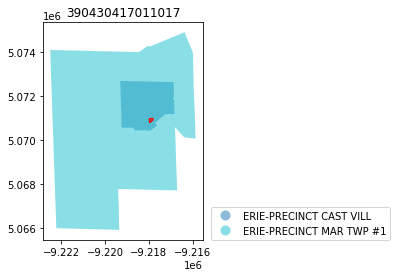

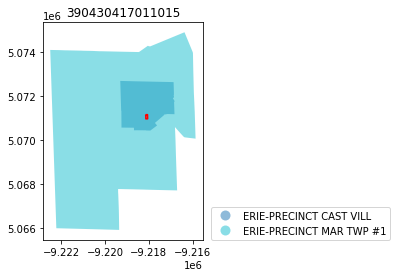

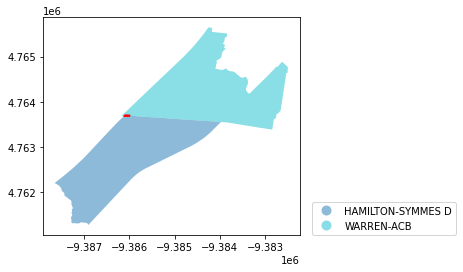

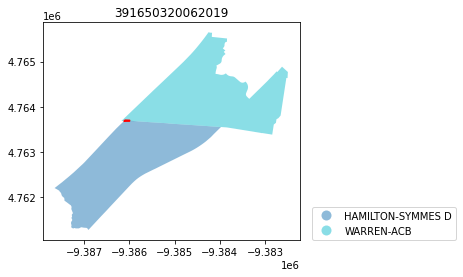

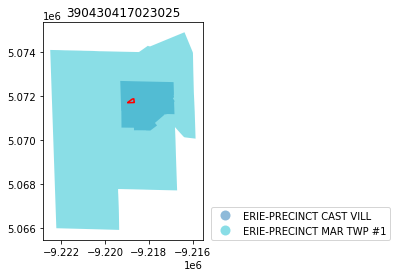

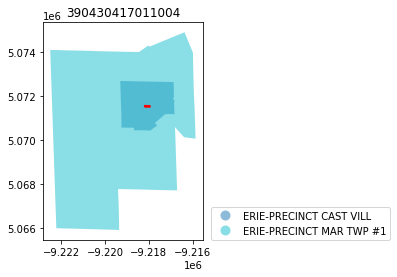

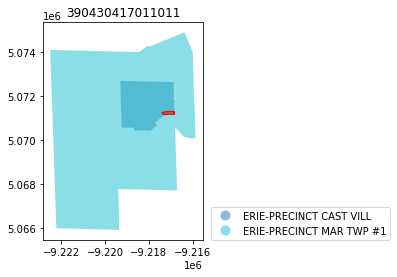

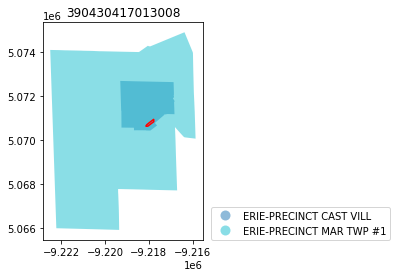

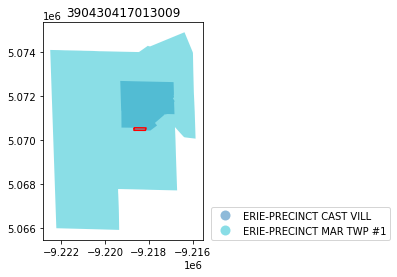

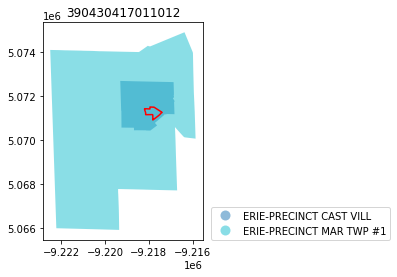

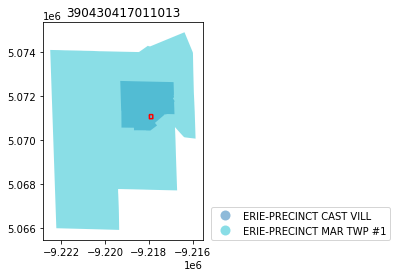

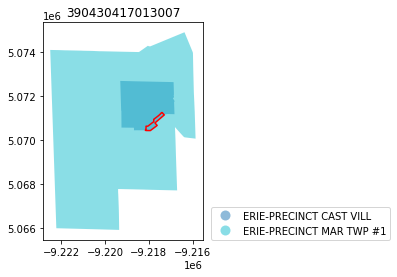

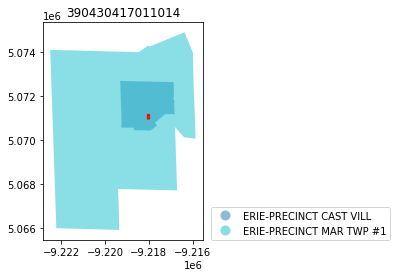

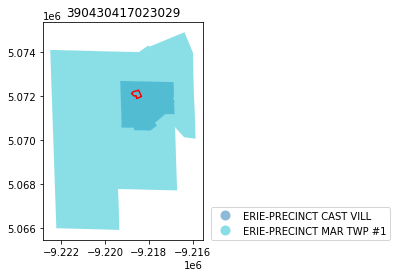

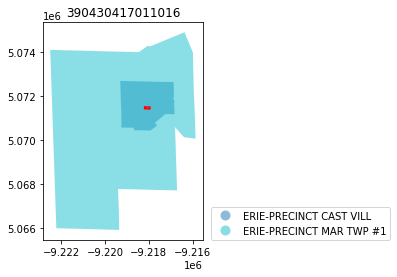

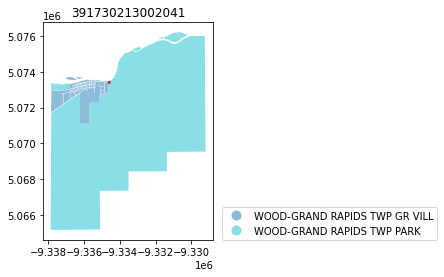

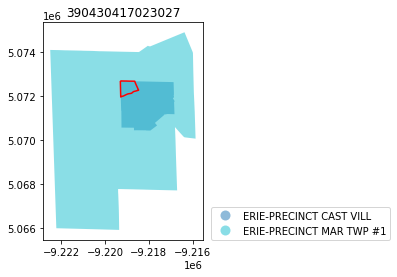

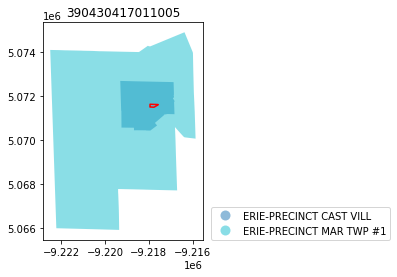

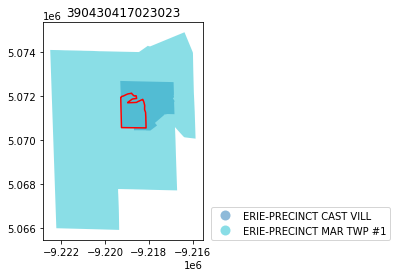

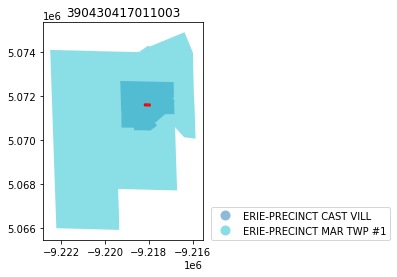

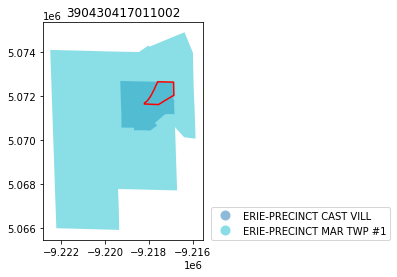

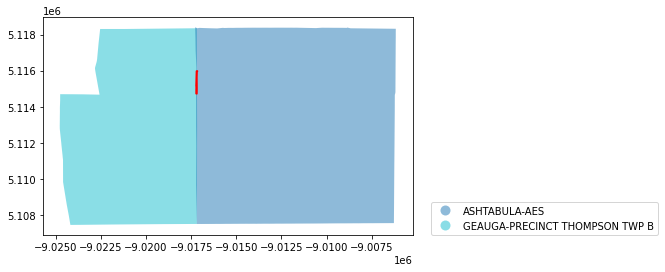

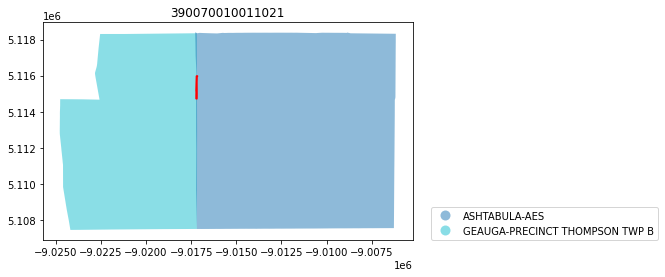

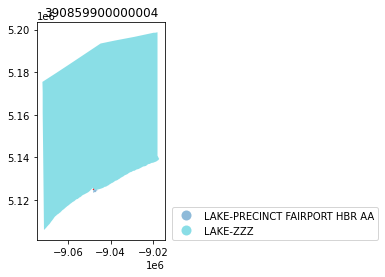

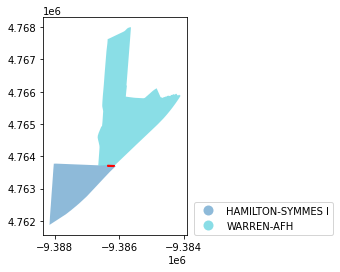

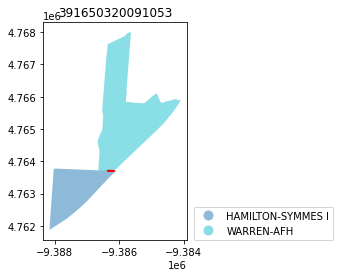

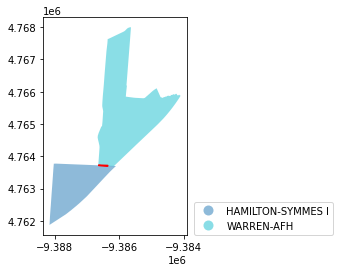

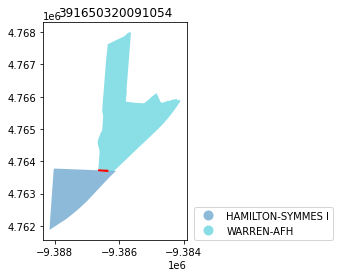

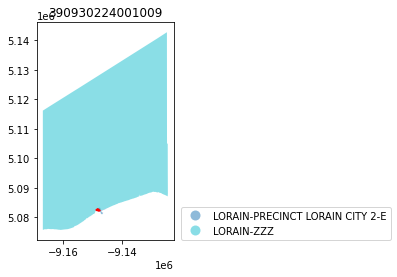

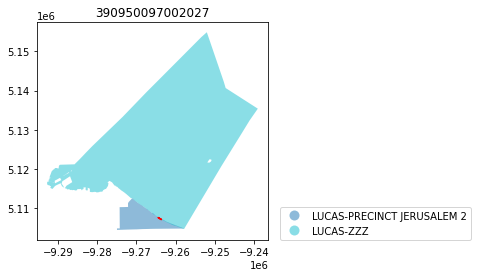

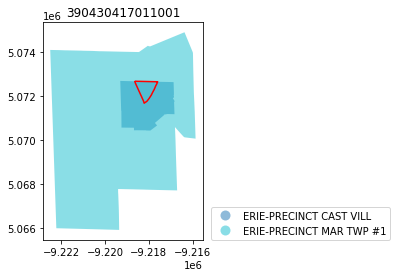

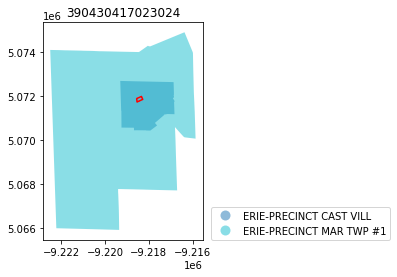

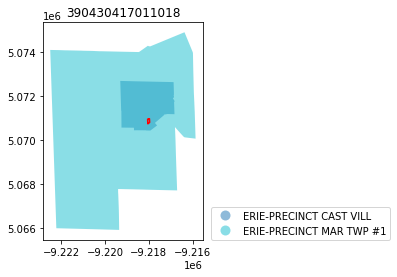

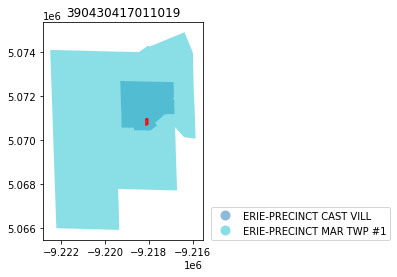

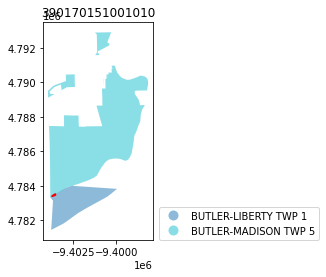

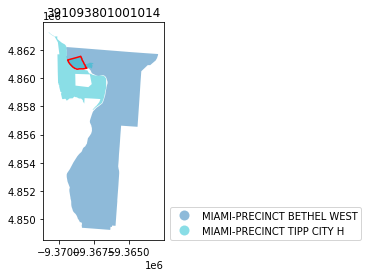

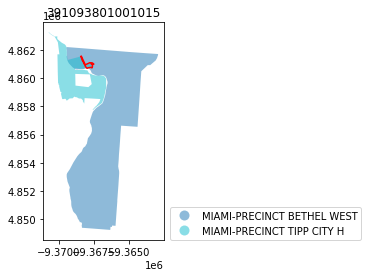

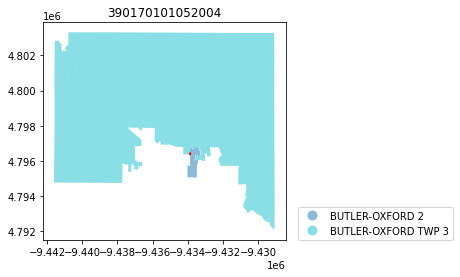

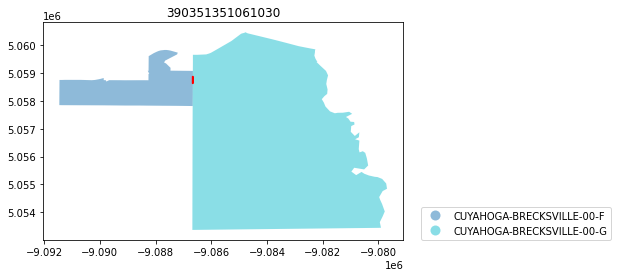

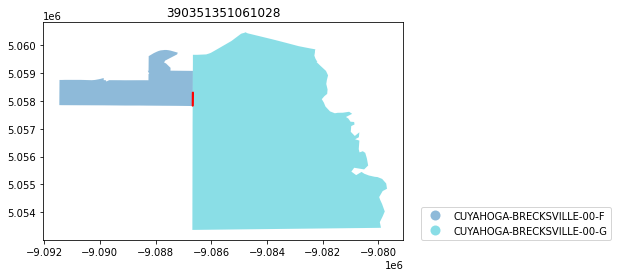

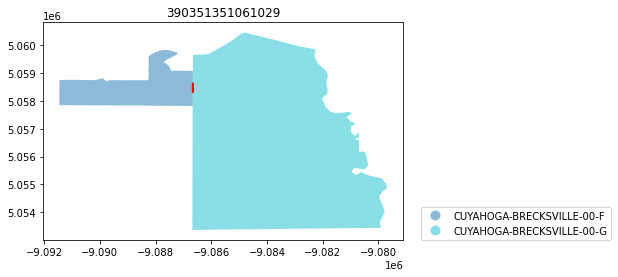

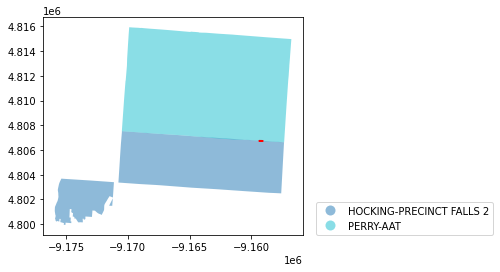

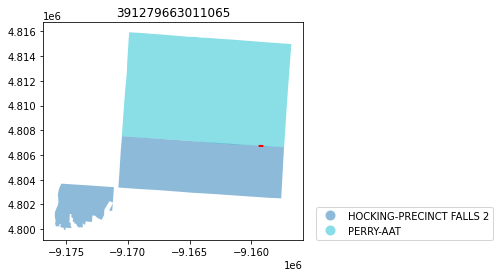

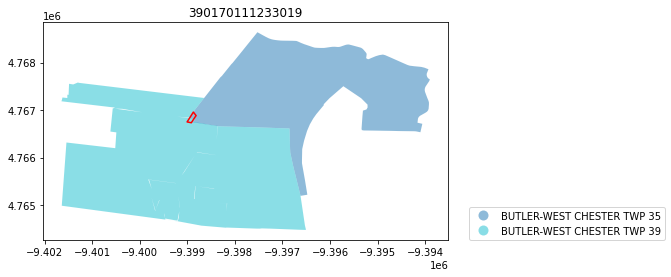

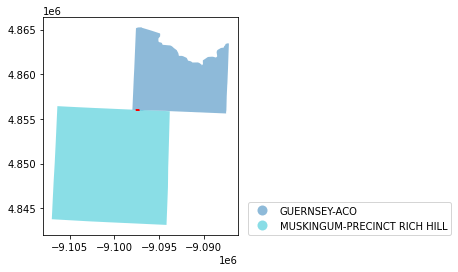

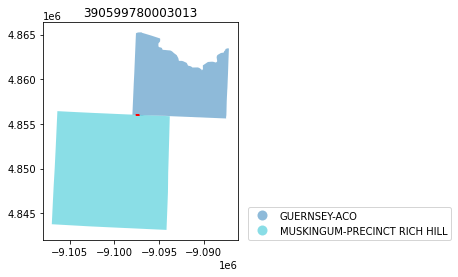

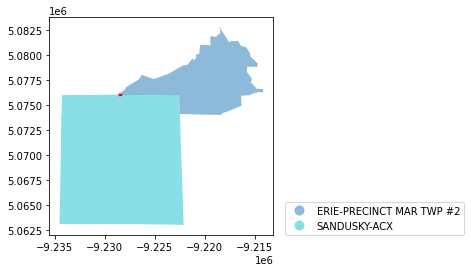

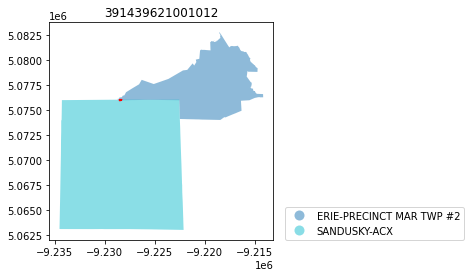

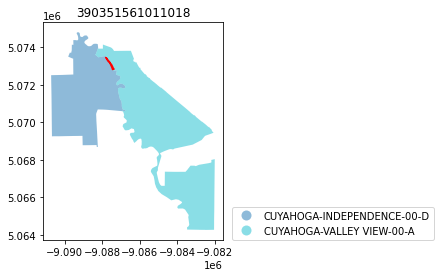

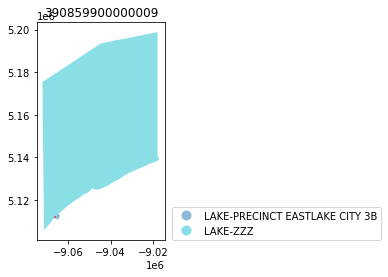

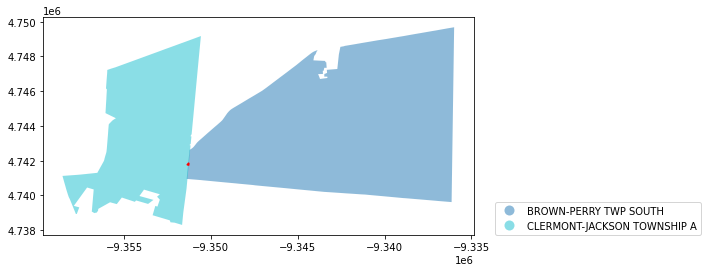

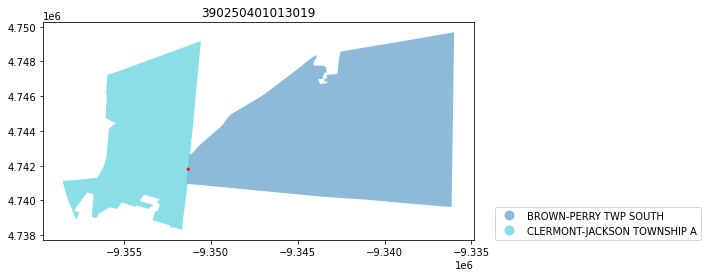

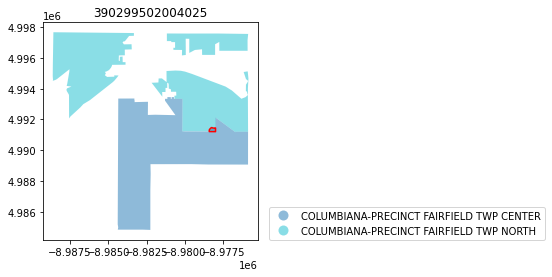

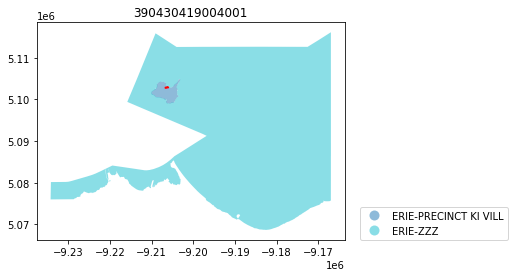

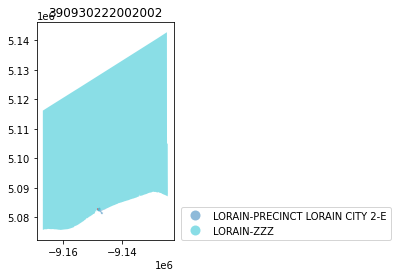

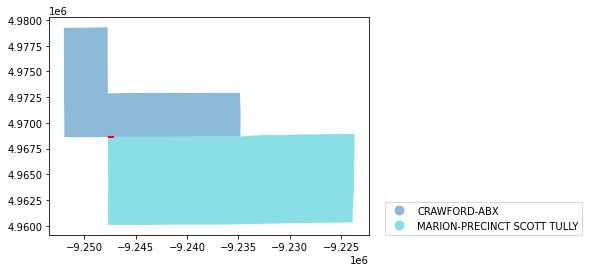

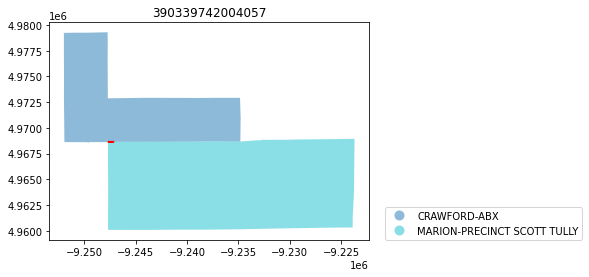

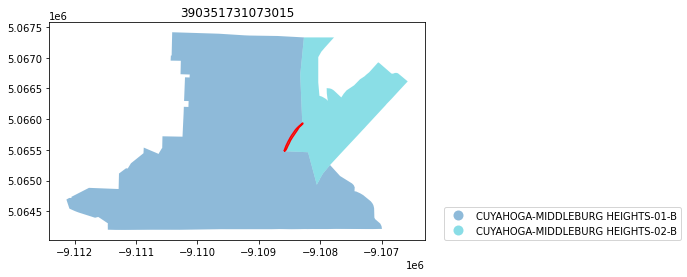

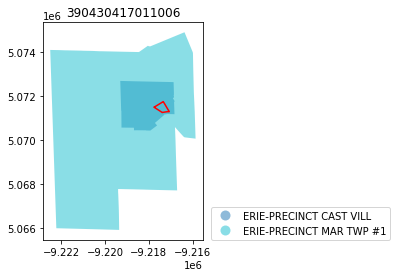

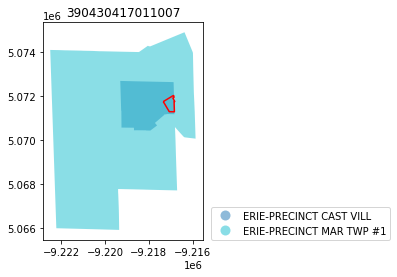

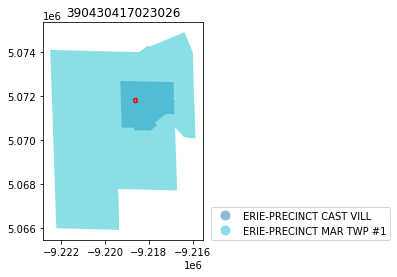

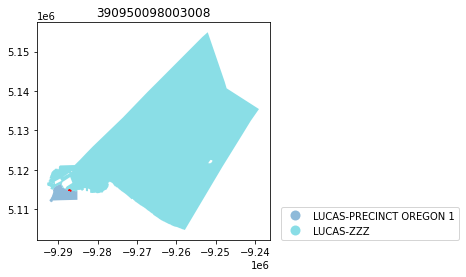

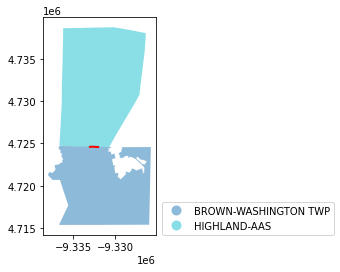

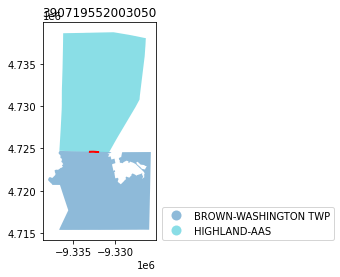

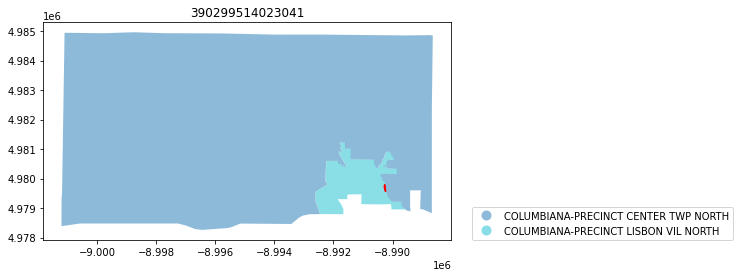

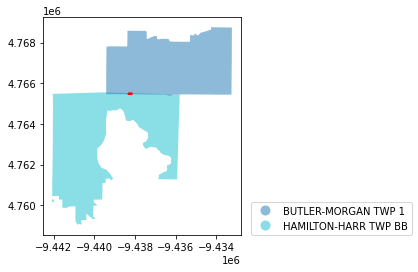

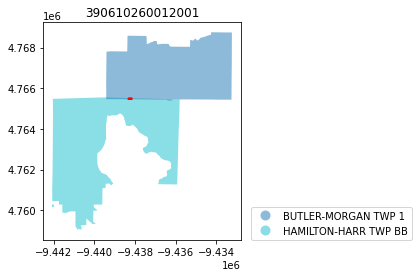

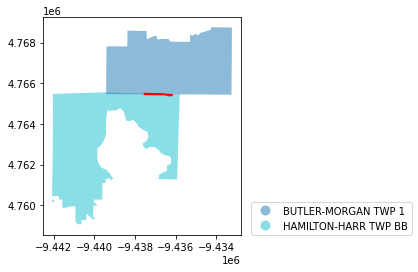

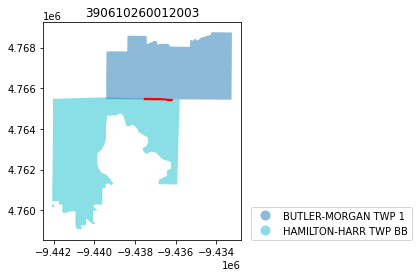

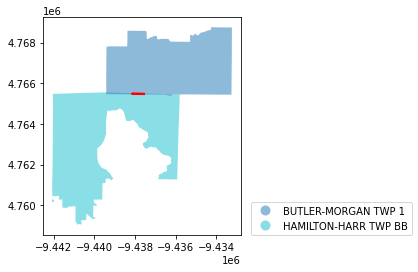

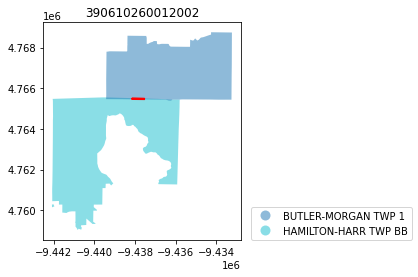

In [35]:
block_dict_problems = {}
clean_list = []
for block in possible_problems:
    precs = list(last_filter[last_filter["GEOID20"]==block]["UNIQUE_ID"])
    counties = [i.split("-")[0] for i in list(last_filter[last_filter["GEOID20"]==block]["UNIQUE_ID"])]
    ax = oh_gen[oh_gen["UNIQUE_ID"].isin(list(last_filter[last_filter["GEOID20"]==block]["UNIQUE_ID"]))].plot(column = "UNIQUE_ID", alpha = .5, legend = True, figsize = (8,4), legend_kwds={'loc':(1.05,0)})
    oh_blocks[oh_blocks["GEOID20"]==block].boundary.plot(ax = ax, color = "red")
    if counties[0] != counties[1]:
        
        clean_list.append(block)
        clean_gdf(block[2:5], counties[0], oh_gen.loc[oh_gen["UNIQUE_ID"]==precs[0],"COUNTYFP"].values[0], counties[1], oh_gen.loc[oh_gen["UNIQUE_ID"]==precs[1],"COUNTYFP"].values[0]) 
        ax = oh_gen[oh_gen["UNIQUE_ID"].isin(list(last_filter[last_filter["GEOID20"]==block]["UNIQUE_ID"]))].plot(column = "UNIQUE_ID", alpha = .5, legend = True, figsize = (8,4), legend_kwds={'loc':(1.05,0)})
        oh_blocks[oh_blocks["GEOID20"]==block].boundary.plot(ax = ax, color = "red")
        ax.set_title(block)
        ax.figure.savefig("./"+block+"_overlap_pre_clean.png", dpi = 350)        
    else:
        block_dict_problems[block] = list(last_filter[last_filter["GEOID20"]==block]["UNIQUE_ID"])

        ax.set_title(block)
        ax.figure.savefig("./"+block+"_overlap.png", dpi = 350)


In [37]:
clean_list

['391650320062019',
 '390070010011021',
 '391650320091053',
 '391650320091054',
 '391279663011065',
 '390599780003013',
 '391439621001012',
 '390250401013019',
 '390339742004057',
 '390719552003050',
 '390610260012001',
 '390610260012003',
 '390610260012002']

390610260012001
Working on precinct #1: HAMILTON
Working on precinct #2: BUTLER
390610260012003
Working on precinct #1: HAMILTON
Working on precinct #2: BUTLER
390070010011021
Working on precinct #1: GEAUGA
Working on precinct #2: ASHTABULA
391650320062019
Working on precinct #1: HAMILTON
Working on precinct #2: WARREN
390610260012002
Working on precinct #1: HAMILTON
Working on precinct #2: BUTLER
390599780003013
Working on precinct #1: MUSKINGUM
Working on precinct #2: GUERNSEY
391650320091053
Working on precinct #1: HAMILTON
Working on precinct #2: WARREN


/Users/lilyfalk/anaconda3/envs/pdv_env/lib/python3.9/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


391650320091054
Working on precinct #1: HAMILTON
Working on precinct #2: WARREN
390719552003050
Working on precinct #1: BROWN
Working on precinct #2: HIGHLAND
390339742004057
Working on precinct #1: MARION
Working on precinct #2: CRAWFORD
390250401013019
Working on precinct #1: BROWN
Working on precinct #2: CLERMONT
391279663011065
Working on precinct #1: HOCKING
Working on precinct #2: PERRY


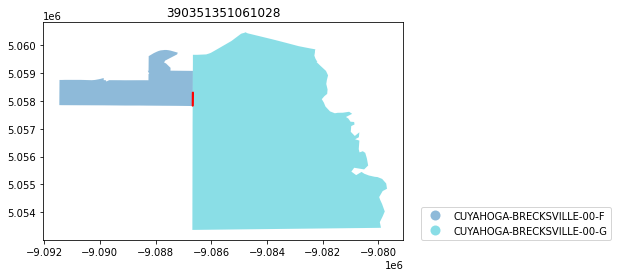

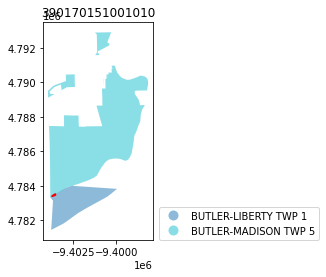

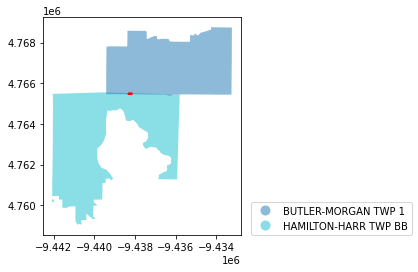

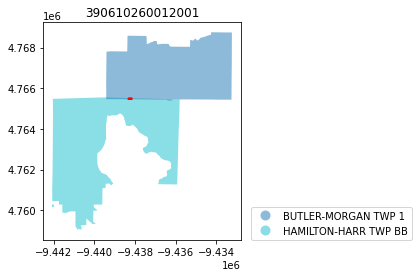

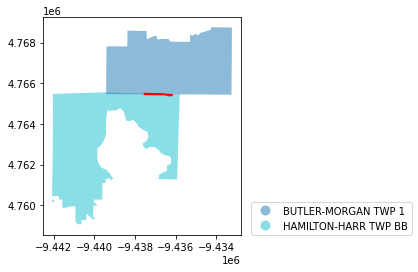

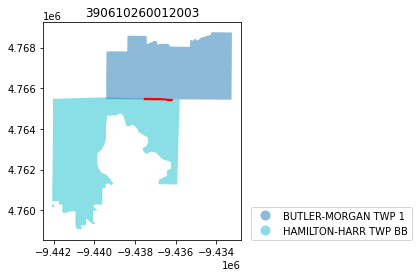

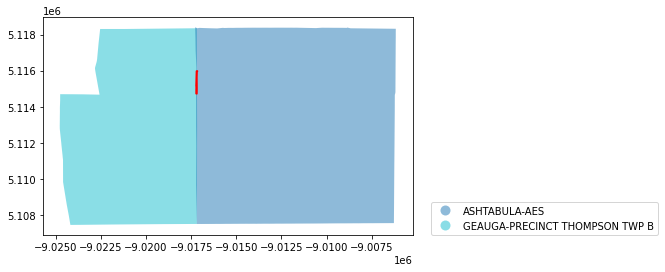

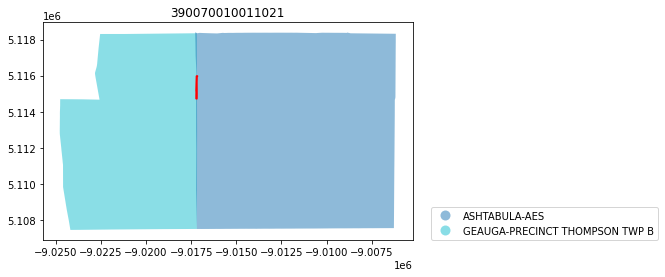

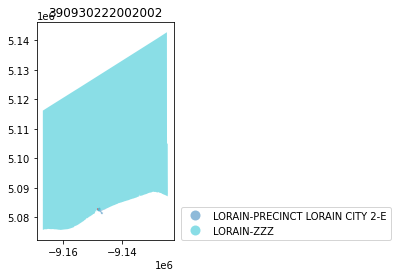

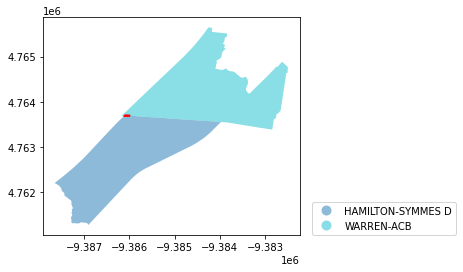

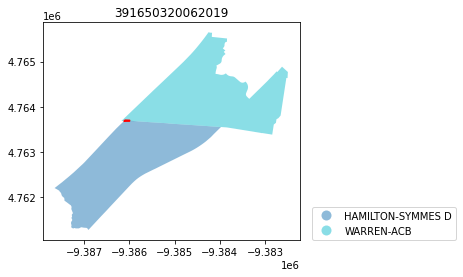

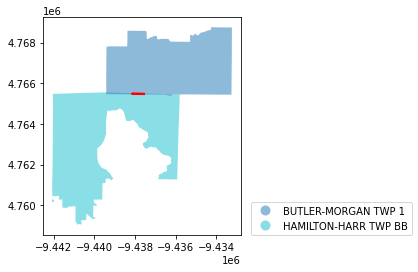

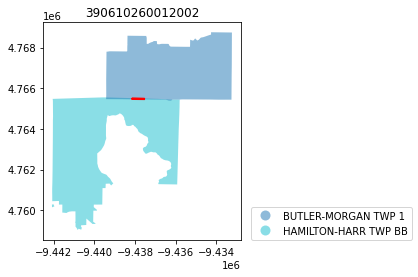

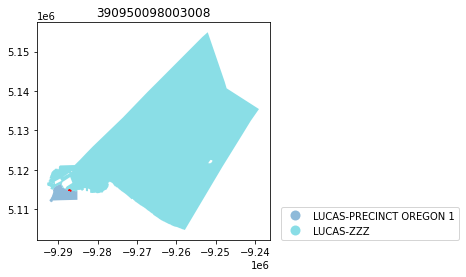

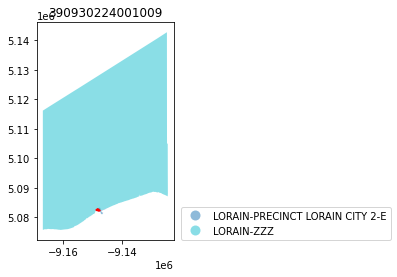

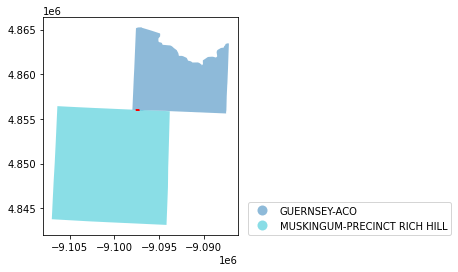

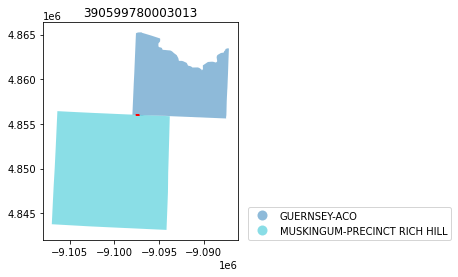

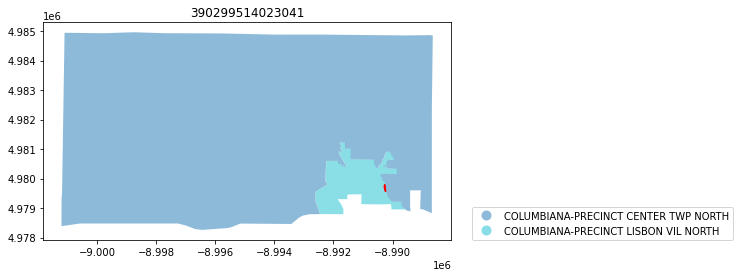

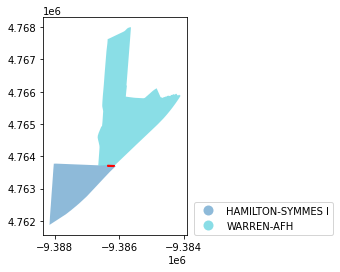

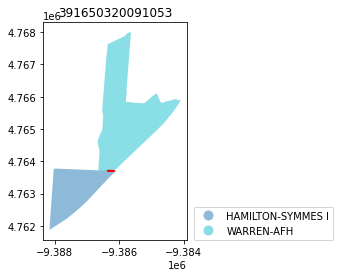

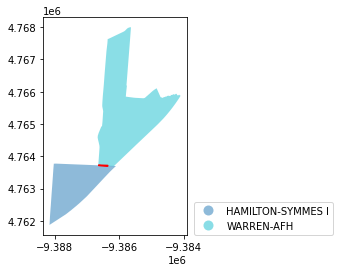

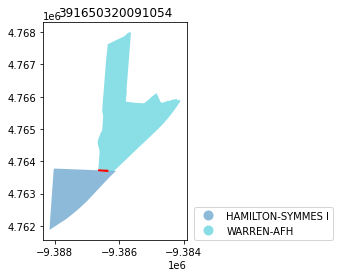

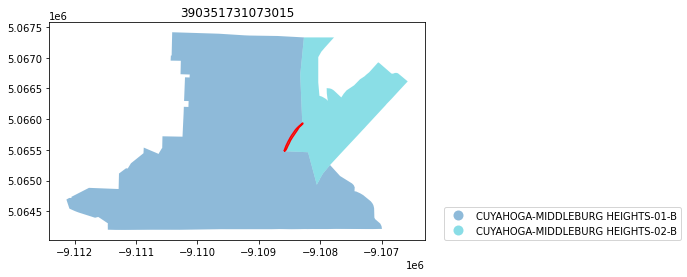

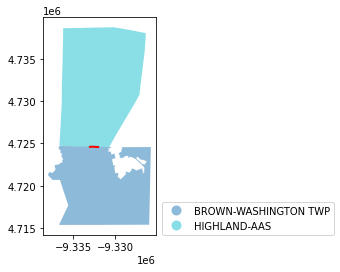

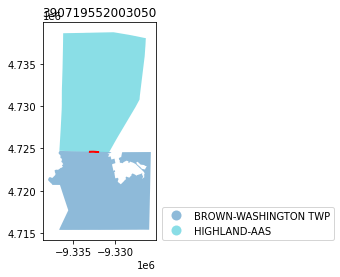

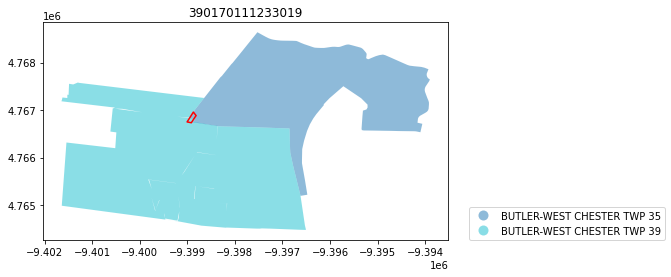

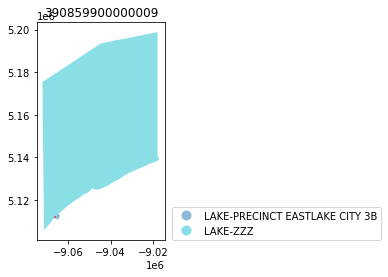

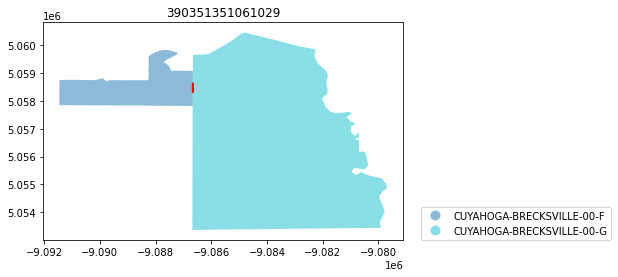

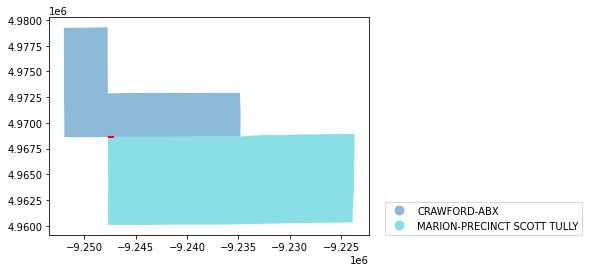

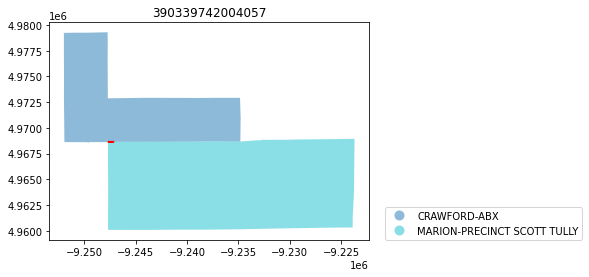

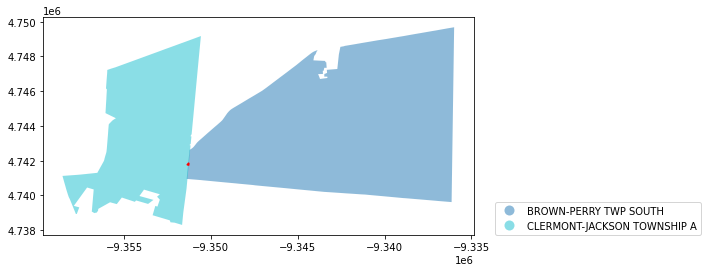

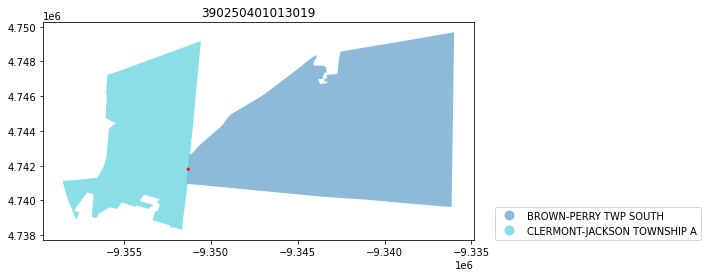

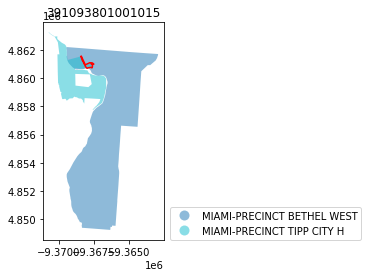

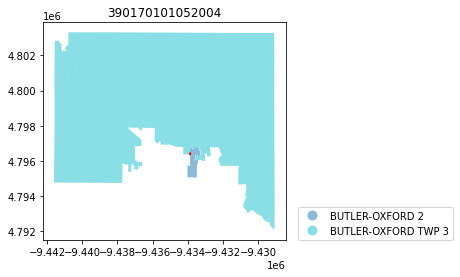

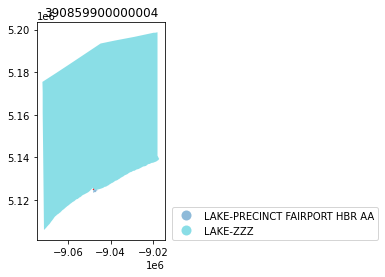

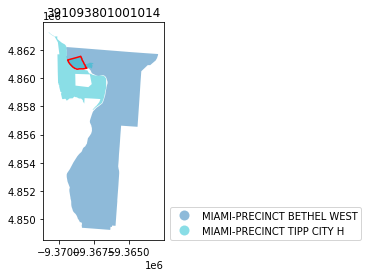

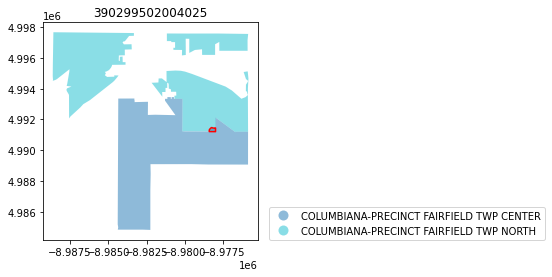

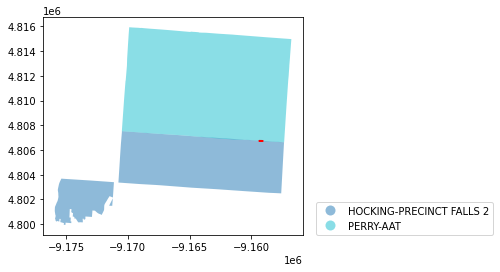

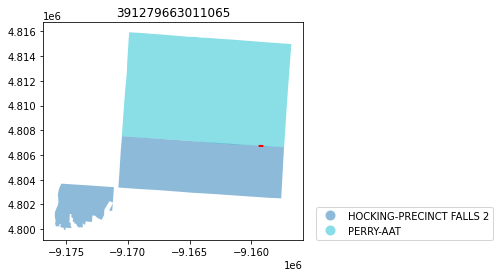

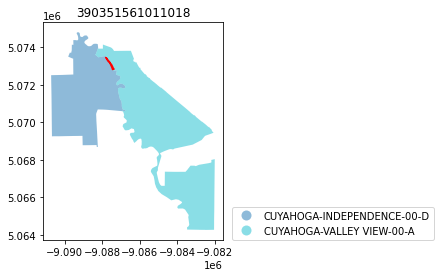

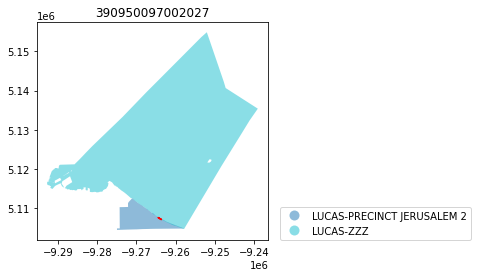

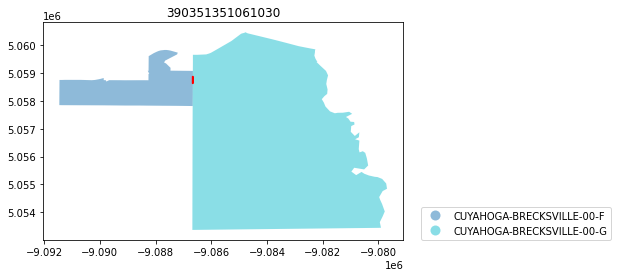

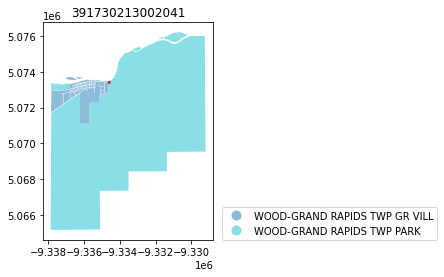

In [38]:
ser_3 = self_intersection_filtered[(self_intersection_filtered["intersection_pct"]>=.5)&(self_intersection_filtered["COUNTYNM"]!="ERIE")]["GEOID20"].value_counts()
possible_problems_updated = list(ser_3[ser_3>=2].index)

block_dict_problems = {}
clean_list = []
for block in possible_problems_updated:
    precs = list(last_filter[last_filter["GEOID20"]==block]["UNIQUE_ID"])
    counties = [i.split("-")[0] for i in list(last_filter[last_filter["GEOID20"]==block]["UNIQUE_ID"])]
    ax = oh_gen[oh_gen["UNIQUE_ID"].isin(list(last_filter[last_filter["GEOID20"]==block]["UNIQUE_ID"]))].plot(column = "UNIQUE_ID", alpha = .5, legend = True, figsize = (8,4), legend_kwds={'loc':(1.05,0)})
    oh_blocks[oh_blocks["GEOID20"]==block].boundary.plot(ax = ax, color = "red")
    if counties[0] != counties[1]:
        
        clean_list.append(block)
        print(block)
        clean_gdf(block[2:5], counties[0], oh_gen.loc[oh_gen["UNIQUE_ID"]==precs[0],"COUNTYFP"].values[0], counties[1], oh_gen.loc[oh_gen["UNIQUE_ID"]==precs[1],"COUNTYFP"].values[0]) 
        ax = oh_gen[oh_gen["UNIQUE_ID"].isin(list(last_filter[last_filter["GEOID20"]==block]["UNIQUE_ID"]))].plot(column = "UNIQUE_ID", alpha = .5, legend = True, figsize = (8,4), legend_kwds={'loc':(1.05,0)})
        oh_blocks[oh_blocks["GEOID20"]==block].boundary.plot(ax = ax, color = "red")
        ax.set_title(block)
        ax.figure.savefig("./"+block+"_overlap_pre_clean.png", dpi = 350)        
    else:
        block_dict_problems[block] = list(last_filter[last_filter["GEOID20"]==block]["UNIQUE_ID"])

        ax.set_title(block)
        ax.figure.savefig("./"+block+"_overlap.png", dpi = 350)

In [39]:
possible_problems_updated

['390351351061028',
 '390170151001010',
 '390610260012001',
 '390610260012003',
 '390070010011021',
 '390930222002002',
 '391650320062019',
 '390610260012002',
 '390950098003008',
 '390930224001009',
 '390599780003013',
 '390299514023041',
 '391650320091053',
 '391650320091054',
 '390351731073015',
 '390719552003050',
 '390170111233019',
 '390859900000009',
 '390351351061029',
 '390339742004057',
 '390250401013019',
 '391093801001015',
 '390170101052004',
 '390859900000004',
 '391093801001014',
 '390299502004025',
 '391279663011065',
 '390351561011018',
 '390950097002027',
 '390351351061030',
 '391730213002041']

In [41]:
block_dict_problems

{'390351351061028': ['CUYAHOGA-BRECKSVILLE-00-F', 'CUYAHOGA-BRECKSVILLE-00-G'],
 '390170151001010': ['BUTLER-LIBERTY TWP 1', 'BUTLER-MADISON TWP 5'],
 '390930222002002': ['LORAIN-PRECINCT LORAIN CITY 2-E', 'LORAIN-ZZZ'],
 '390950098003008': ['LUCAS-PRECINCT OREGON 1', 'LUCAS-ZZZ'],
 '390930224001009': ['LORAIN-PRECINCT LORAIN CITY 2-E', 'LORAIN-ZZZ'],
 '390299514023041': ['COLUMBIANA-PRECINCT LISBON VIL NORTH',
  'COLUMBIANA-PRECINCT CENTER TWP NORTH'],
 '390351731073015': ['CUYAHOGA-MIDDLEBURG HEIGHTS-01-B',
  'CUYAHOGA-MIDDLEBURG HEIGHTS-02-B'],
 '390170111233019': ['BUTLER-WEST CHESTER TWP 35',
  'BUTLER-WEST CHESTER TWP 39'],
 '390859900000009': ['LAKE-PRECINCT EASTLAKE CITY 3B', 'LAKE-ZZZ'],
 '390351351061029': ['CUYAHOGA-BRECKSVILLE-00-F', 'CUYAHOGA-BRECKSVILLE-00-G'],
 '391093801001015': ['MIAMI-PRECINCT BETHEL WEST',
  'MIAMI-PRECINCT TIPP CITY H'],
 '390170101052004': ['BUTLER-OXFORD 2', 'BUTLER-OXFORD TWP 3'],
 '390859900000004': ['LAKE-PRECINCT FAIRPORT HBR AA', 'LAKE-ZZZ'],

In [42]:
newer = [i for i in possible_problems if i not in clean_list]
len(newer)

46

In [43]:
maup.assign(oh_blocks[~oh_blocks["GEOID20"].isin(newer)], oh_gen)

TopologyException: side location conflict at -9149043.8625458628 5082088.7979417117


AttributeError: 'PreparedGeometry' object has no attribute 'is_valid'

In [44]:
set(i[2:5] for i in possible_problems)

{'007',
 '017',
 '025',
 '029',
 '033',
 '035',
 '043',
 '059',
 '061',
 '071',
 '085',
 '093',
 '095',
 '109',
 '127',
 '143',
 '165',
 '173'}

In [45]:
len(possible_problems)

58

In [46]:
oh_blocks_filtered = oh_blocks[~oh_blocks["GEOID20"].isin(possible_problems)]

In [47]:
maup.assign(oh_blocks_filtered, oh_gen)

TopologyException: side location conflict at -9149043.8625458628 5082088.7979417117


AttributeError: 'PreparedGeometry' object has no attribute 'is_valid'

In [48]:
oh_blocks.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Showing lily ex of how to get overlap from single gdf

In [135]:
county_overlap = gp.overlay(oh_gen, oh_gen, how = "intersection", keep_geom_type = False)

In [137]:
county_overlap_filtered = county_overlap[county_overlap["COUNTYFP_1"]!=county_overlap["COUNTYFP_2"]]

In [ ]:
county_overlap_filtered

In [140]:
county_overlap_filtered[["COUNTYFP_1", "COUNTYFP_2"]].drop_duplicates()

,COUNTYFP_1,COUNTYFP_2
6,109,023
7,113,023
43,023,109
49,113,109
50,023,113
...,...,...
42830,081,067
43700,075,169
44145,081,013
44326,013,081
